In [2]:
import backtrader as bt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import backtrader.analyzers as btanalyzers
import math

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

import quantstats


In [7]:
class my_strategy1(bt.Strategy):
    #全局设定交易策略的参数
    params=(
        ('maperiod1',20),('maperiod2',5),
           )

    def __init__(self):
        #指定价格序列
        self.dataclose=self.datas[0].close
        # 初始化交易指令、买卖价格和手续费
        self.order = None
        self.buyprice = None
        self.buycomm = None
        #添加移动均线指标，内置了talib模块
        k = 1.5
        
        self.ma20 = bt.indicators.SimpleMovingAverage(
                      self.datas[0], period=self.params.maperiod1)
        
        self.std20 = bt.indicators.StandardDeviation(
                      self.datas[0], period=self.params.maperiod2)
        
        self.high = self.ma20 + k * self.std20 
        self.low = self.ma20 - k * self.std20 

    def next(self):
#         if self.order: # 检查是否有指令等待执行,
#             return
#         # 检查是否持仓
        size_1 = math.floor(cerebro.broker.get_cash() * 0.3 / self.datas[0].close[0])
        size_2 = math.floor(self.broker.getposition(self.data).size * 0.7)
#         print(cerebro.broker.get_cash())
        if not self.position: # 没有持仓
            # 跌破通道买入
            if self.dataclose[0] < self.low and self.dataclose[-1] >= self.low:
                self.order = self.buy(size=size_1)
        else:
            if self.dataclose[0] < self.low and self.dataclose[-1] >= self.low:
                self.order = self.buy(size=size_1)
            # 超出通道卖出
            if self.dataclose[0] > self.high and self.dataclose[-1] < self.high:
                self.order = self.sell(size=size_2)




初始资金: 10000
回测期间：20180830:20200830
16480.88000000012
总资金: 17296.31
净收益: 7296.31


<IPython.core.display.Javascript object>


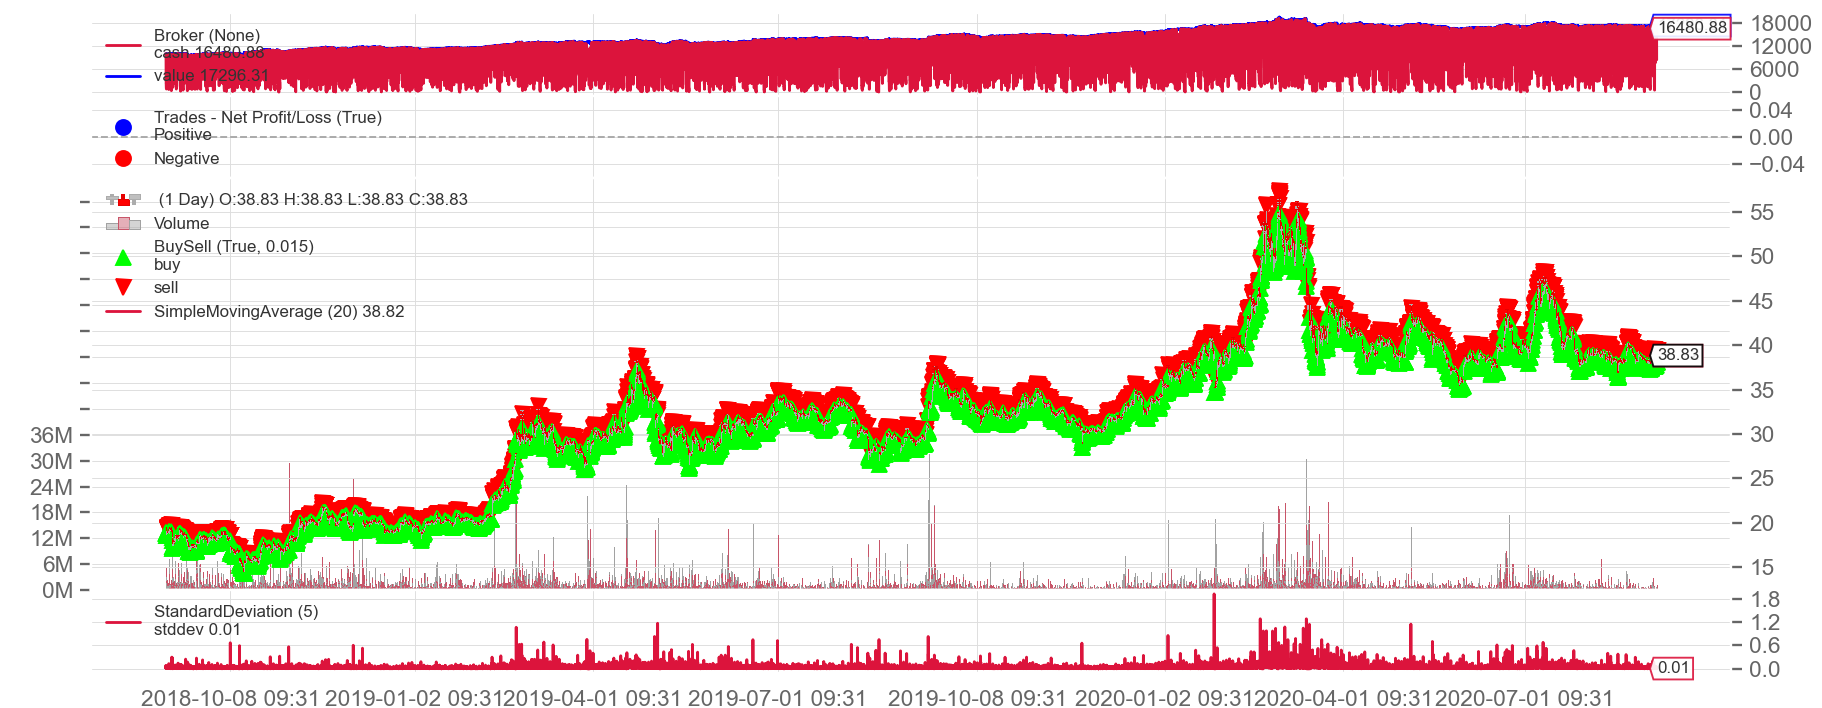

[[<Figure size 432x288 with 5 Axes>]]

In [8]:
df = pd.read_csv('data/000063.XSHE.csv')
df.index = pd.to_datetime(df.date)
df['openinterest'] = 0
df = df[['open', 'close', 'high', 'low', 'volume', 'openinterest']]
#     print(df)
start = datetime(2018, 8, 30)
end = datetime(2020, 8, 30)
data = bt.feeds.PandasData(dataname=df, fromdate=start, todate=end)
# 初始化cerebro回测系统设置
cerebro = bt.Cerebro()
# 将数据传入回测系统
cerebro.adddata(data)
# 将交易策略加载到回测系统中
cerebro.addstrategy(my_strategy1)
# 设置初始资本为10,000
startcash = 10000
cerebro.broker.setcash(startcash)
# 设置交易手续费为 0.2%
cerebro.broker.setcommission(commission=0)

d1 = start.strftime('%Y%m%d')
d2 = end.strftime('%Y%m%d')
print(f'初始资金: {startcash}\n回测期间：{d1}:{d2}')
#运行回测系统
cerebro.run()
#获取回测结束后的总资金
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(cerebro.broker.get_cash())
# print(cerebro.broker.getposition.size)
# print(cerebro.broker.getposition.price)

print(f'总资金: {round(portvalue,2)}')
print(f'净收益: {round(pnl, 2)}')


cerebro.plot(style='candlestick')

起始资金 10000
----------------------------
总资产  17296.31000000012
----------------------------
总收益:    54.79%
年化收益:  32.93%
最大回撤:  17.07%
夏普比率:  1.5


<IPython.core.display.Javascript object>


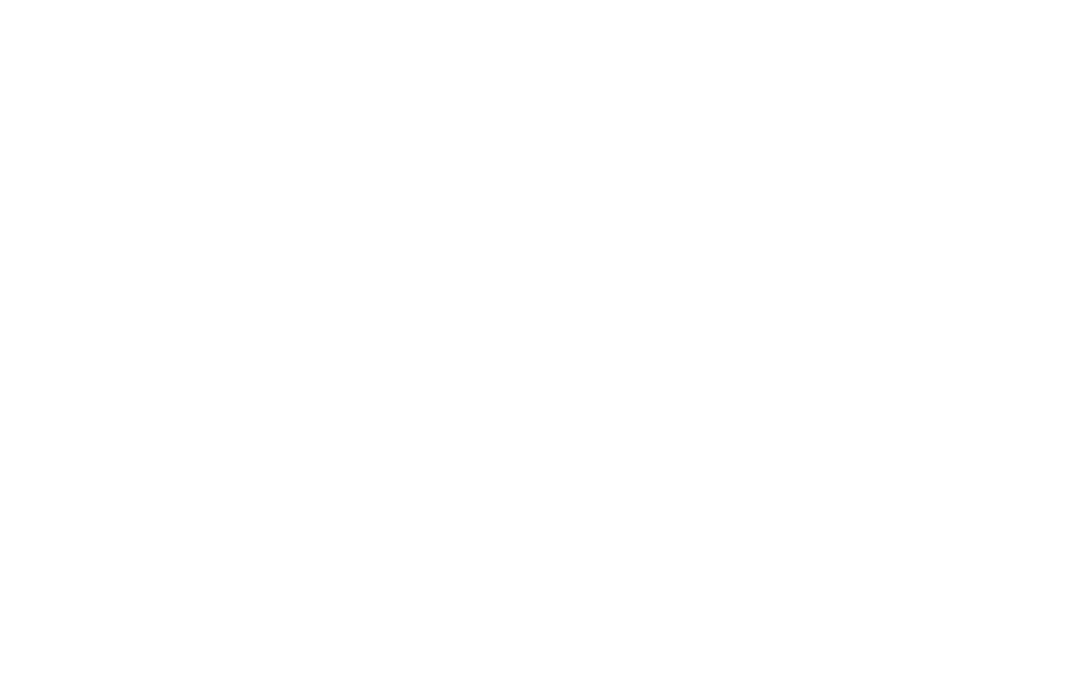

<IPython.core.display.Javascript object>


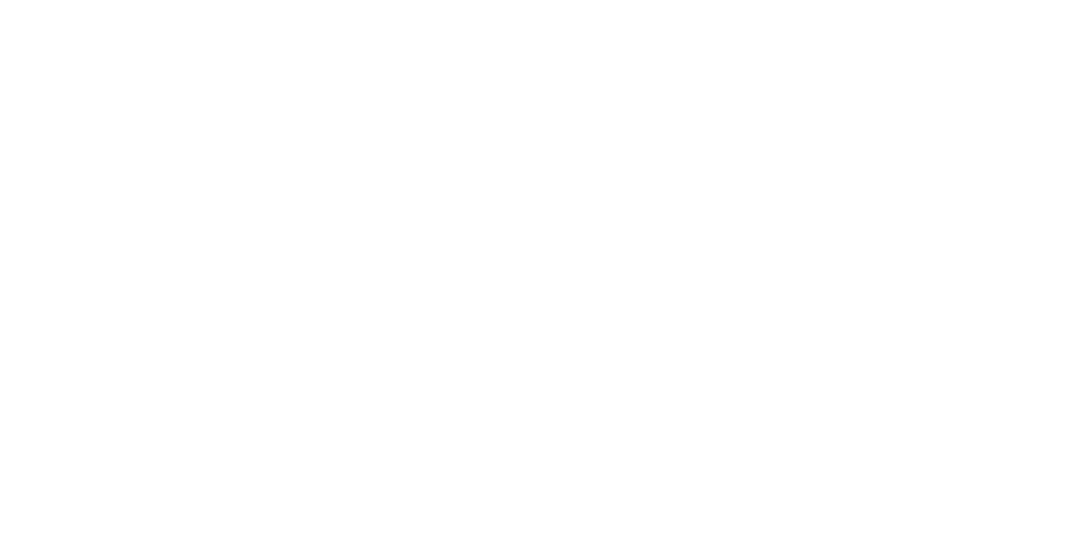

<IPython.core.display.Javascript object>


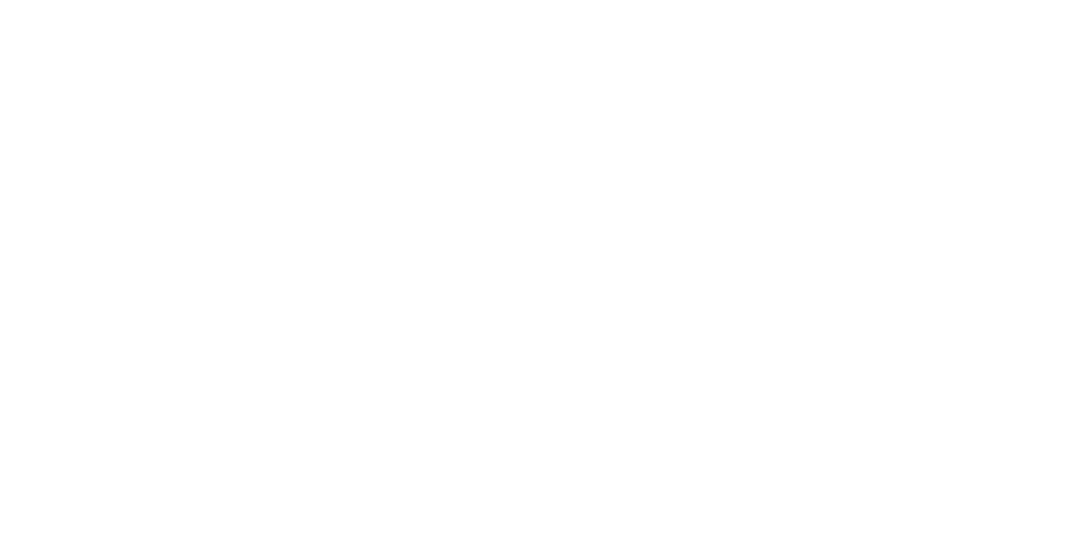

<IPython.core.display.Javascript object>


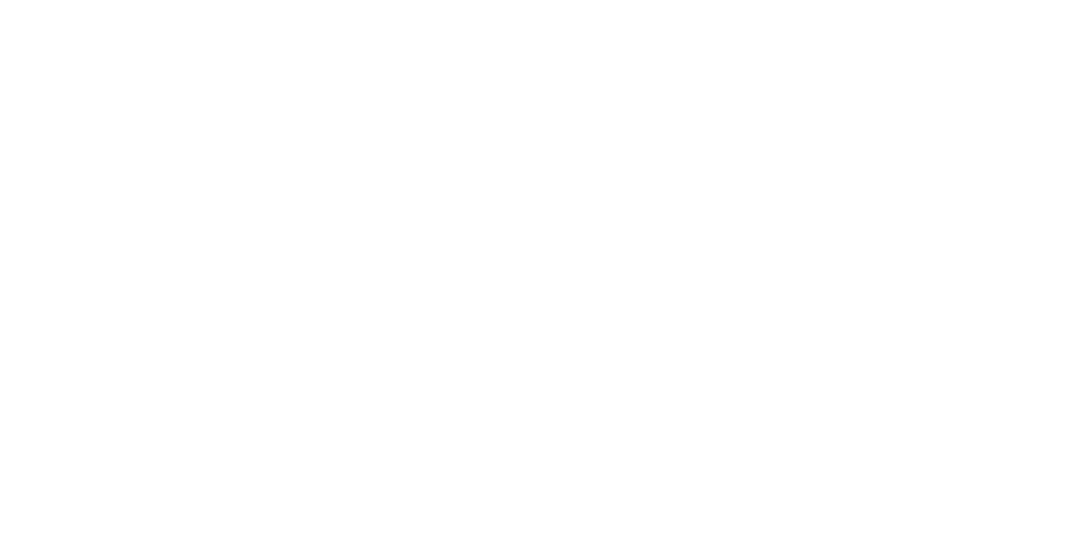

<IPython.core.display.Javascript object>


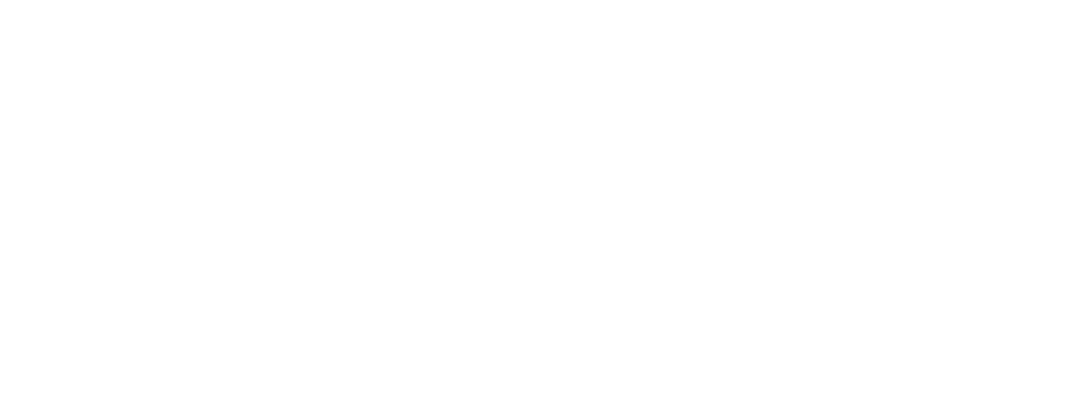

<IPython.core.display.Javascript object>


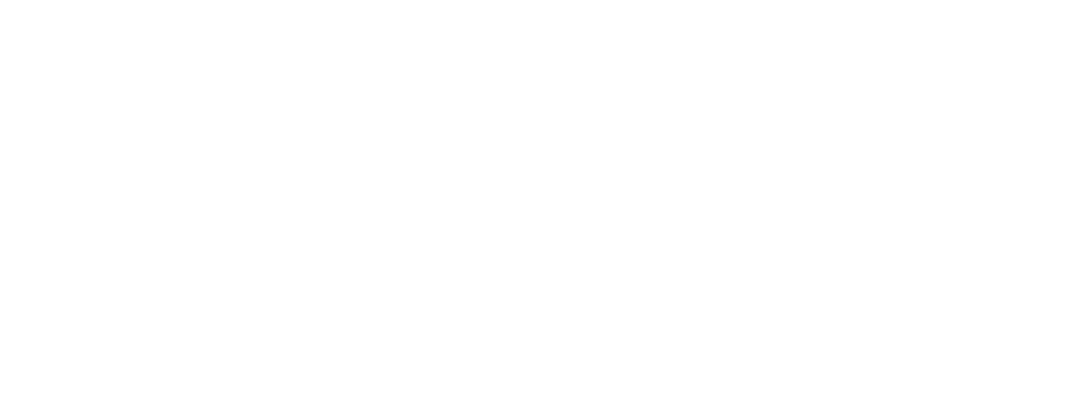

<IPython.core.display.Javascript object>


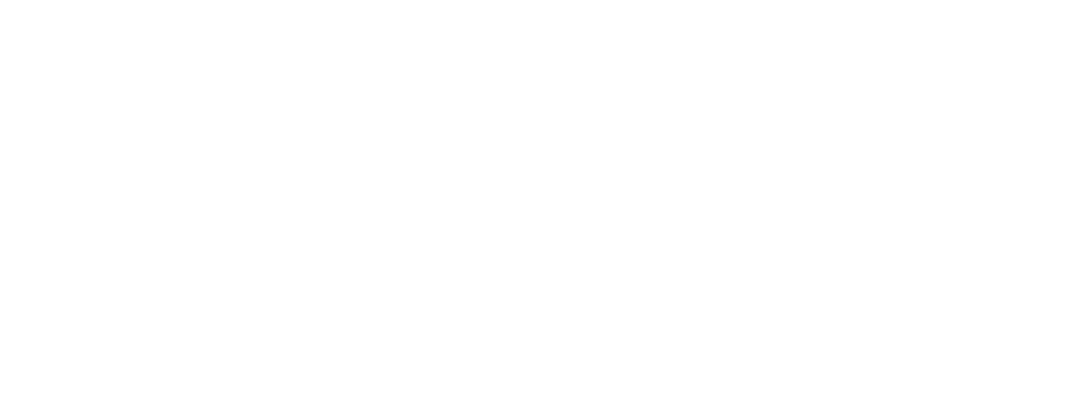

<IPython.core.display.Javascript object>


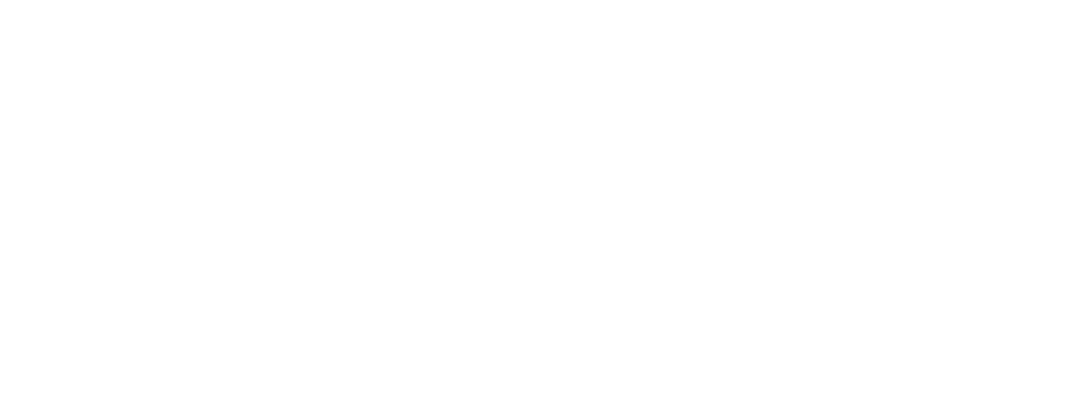

<IPython.core.display.Javascript object>


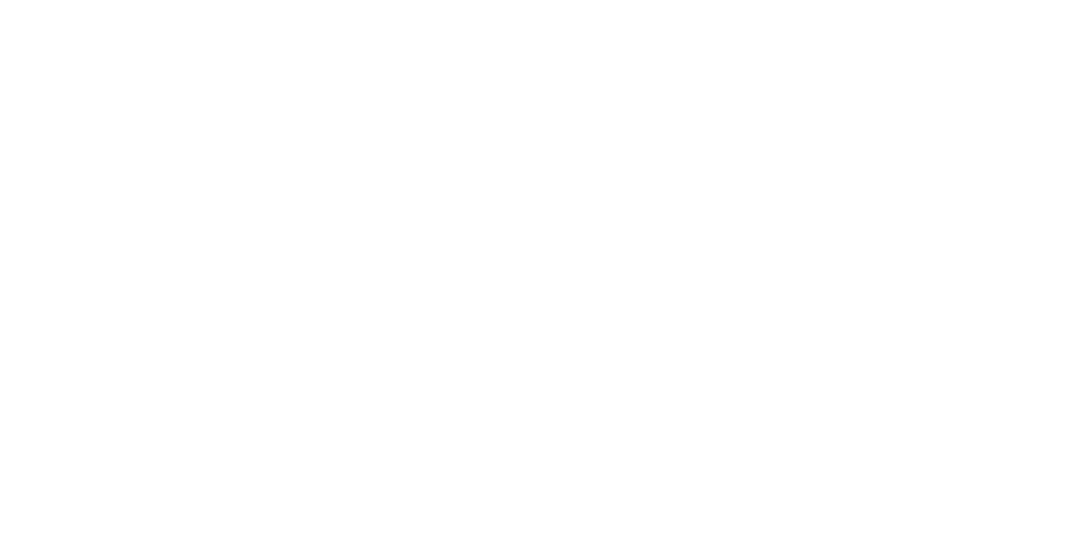

<IPython.core.display.Javascript object>


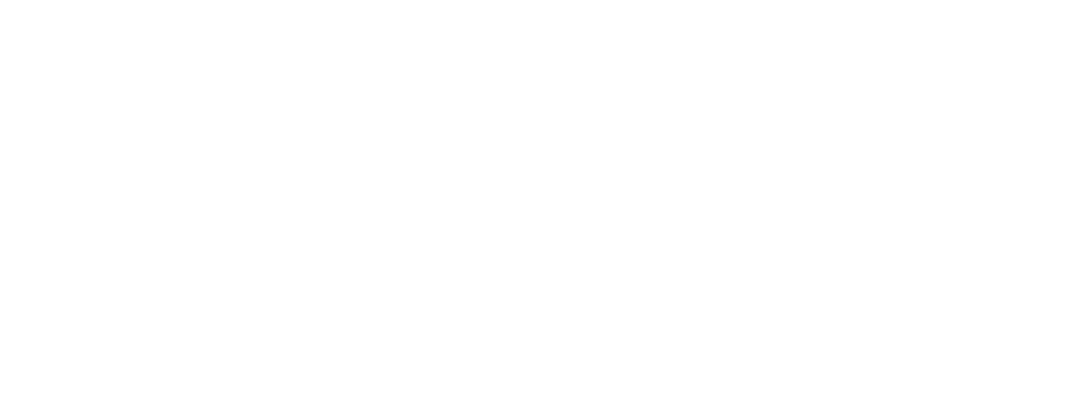

<IPython.core.display.Javascript object>


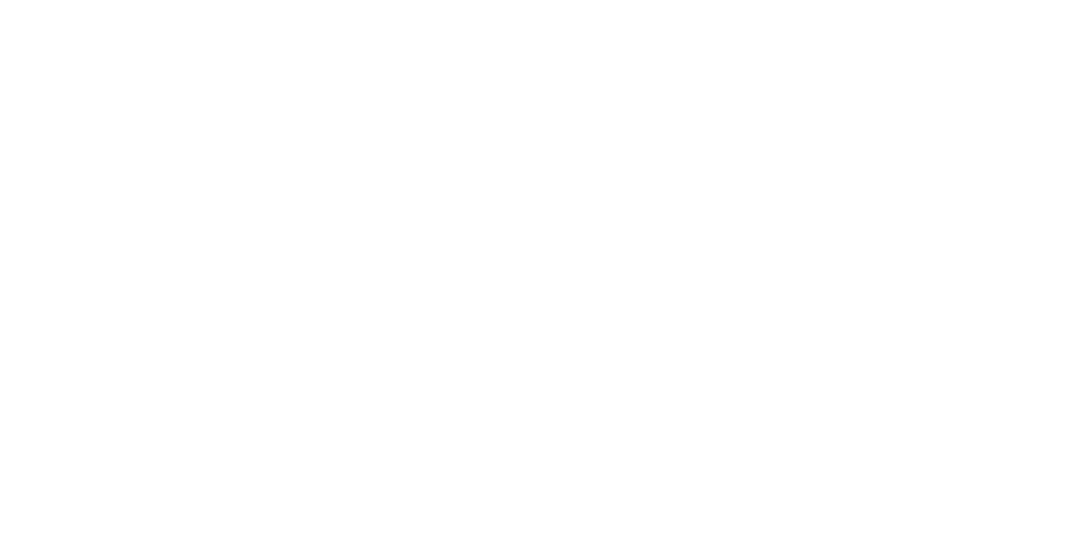

<IPython.core.display.Javascript object>


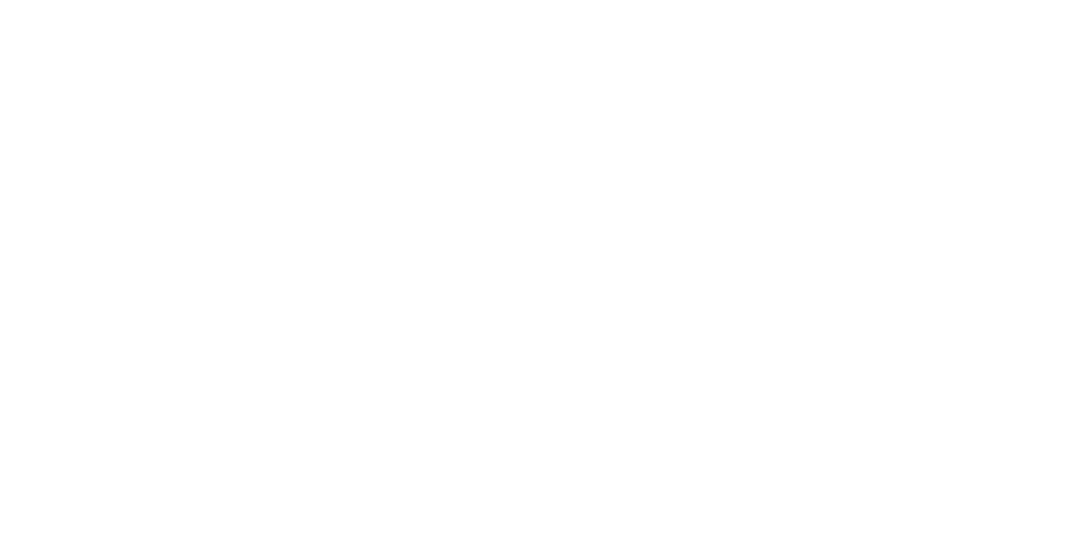

In [10]:
stock = '000063.XSHE'
start = datetime(2018, 8, 30)
end = datetime(2020, 8, 30)

df = pd.read_csv('data/000063.XSHE.csv')
df.index = pd.to_datetime(df.date)
df['openinterest'] = 0
df = df[['open', 'close', 'high', 'low', 'volume', 'openinterest']]

data = bt.feeds.PandasData(dataname=df, fromdate=start, todate=end)

cerebro = bt.Cerebro()
cerebro.adddata(data)

cerebro.addstrategy(my_strategy1)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0)
# cerebro.addsizer(bt.sizers.PercentSizer, percents=100)

cerebro.addanalyzer(btanalyzers.SharpeRatio, _name = 'sharpe')
cerebro.addanalyzer(btanalyzers.DrawDown, _name = 'drawdown')
cerebro.addanalyzer(btanalyzers.Returns, _name='returns')
cerebro.addanalyzer(btanalyzers.SQN, _name='sqn')
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')


print(f'起始资金 {cerebro.broker.getvalue()}')
result = cerebro.run()

print('----------------------------')
print(f'总资产  {cerebro.broker.getvalue()}')
print('----------------------------')
print(f"总收益:    {round(result[0].analyzers.returns.get_analysis()['rtot']*100, 2)}%")
print(f"年化收益:  {round(result[0].analyzers.returns.get_analysis()['rnorm100'],2)}%")
print(f"最大回撤:  {round(result[0].analyzers.drawdown.get_analysis()['max']['drawdown'],2)}%")
print(f"夏普比率:  {round(result[0].analyzers.sharpe.get_analysis()['sharperatio'],2)}")
#print(f"SQN:           {round(result[0].analyzers.sqn.get_analysis()['sqn'],2)}")
portfolio_stats = result[0].analyzers.getbyname('PyFolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)
quantstats.reports.html(returns, output=f'results/{stock}_Result_BOLL.html', title=f'{stock} BOLL Analysis')